### Feature Engineering
Feature engineering is a crucial step in the data pre-processing phase of machine learning,
where data scientists and machine learning engineers create new features or modify existing
ones to improve the performance of machine learning models.

## Feature Encoding

### `1. Categorical data`
#### `Ordinal Encoding`:- On ordinal data (education level)
#### `One Hot encoding`:- Nominal Data
-------------------------------------------------------------------------------

### `2. Target Variable`
#### Label encoding
#### Label binarizer
#### Multi Label binarizer
-------------------------------------------------------------------------------

### `3.Discretrization`


In [18]:
import pandas as pd
import numpy as np

In [19]:
df = pd.read_csv('customer.csv')

In [20]:
df.sample(4)

,age,gender,review,education,purchased
15,75,Male,Poor,UG,No
9,74,Male,Good,UG,Yes
3,72,Female,Good,PG,No
13,57,Female,Average,School,No


#### Ordinal Encoding 

In [21]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split


In [22]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,2:4], df.iloc[:,-1], test_size=0.2)

In [23]:
X_train

,review,education
35,Poor,School
17,Poor,UG
42,Good,PG
1,Poor,UG
20,Average,School
28,Poor,School
7,Poor,School
0,Average,School
38,Good,School
36,Good,UG


In [24]:
# Specifying the order here
oe = OrdinalEncoder(categories=[['Poor', 'Average','Good'],['School','UG','PG']])

In [25]:
X_train = oe.fit_transform(X_train) # first looking for the data and then training it
# fit only works with training data not testing
X_test = oe.transform(X_test) # 

In [26]:
X_train

,review,education
35,0.0,0.0
17,0.0,1.0
42,2.0,2.0
1,0.0,1.0
20,1.0,0.0
28,0.0,0.0
7,0.0,0.0
0,1.0,0.0
38,2.0,0.0
36,2.0,1.0


In [27]:
oe.categories_
# tells everything about the category

[array(['Poor', 'Average', 'Good'], dtype=object),
 array(['School', 'UG', 'PG'], dtype=object)]

In [28]:
oe.feature_names_in_
# ordinal encoding is applied in which features

array(['review', 'education'], dtype=object)

In [29]:
oe.inverse_transform(np.array([0,2]).reshape(1,2))
# it is opposite of encoding
# converts number to categories

array([['Poor', 'PG']], dtype=object)

In [30]:
# handling unknown category
oe.transform(np.array(['Poor','college']).reshape(1,2))

c:\Users\rahul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


ValueError: Found unknown categories [np.str_('college')] in column 1 during transform

In [33]:
# set unknown value
# if user give any other value then also it will work with handle_unknown='', unknown_value=-1
oe = OrdinalEncoder(categories=[['Poor','Average','Good'],['School','UG','PG']],
                    handle_unknown='use_encoded_value',
                    unknown_value=-1)
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:2], df.iloc[:,-1], test_size=0.2)
X_train = oe.fit_transform(X_train)
oe.transform(np.array(['Poor','college']).reshape(1,2))

ValueError: invalid literal for int() with base 10: 'Poor'

In [26]:
# handling infrequent category
# rare category
X = np.array([['dog']*5+ ['cat']*20 + ['rabbit']*10+ ['snake']*3], dtype=object).T
X

array([['dog'],
       ['dog'],
       ['dog'],
       ['dog'],
       ['dog'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['rabbit'],
       ['rabbit'],
       ['rabbit'],
       ['rabbit'],
       ['rabbit'],
       ['rabbit'],
       ['rabbit'],
       ['rabbit'],
       ['rabbit'],
       ['rabbit'],
       ['snake'],
       ['snake'],
       ['snake']], dtype=object)

In [27]:
# limiting the no of category
enc = OrdinalEncoder(max_categories=3).fit(X)

In [28]:
enc.infrequent_categories_

[array(['dog', 'snake'], dtype=object)]

In [29]:
enc.transform(np.array([['cat','rabbit','snake','dog']]).reshape(4,1))

array([[0.],
       [1.],
       [2.],
       [2.]])

In [30]:
data = [['dog'],[np.nan],['cat'],['fish'],[np.nan]]
encoder = OrdinalEncoder(encoded_missing_value=np.nan)
encoder_data = encoder.fit_transform(data)
print(encoder_data)

[[ 1.]
 [nan]
 [ 0.]
 [ 2.]
 [nan]]


## Label encoding

In [34]:
df.head()

,age,gender,review,education,purchased
0,30,Female,Average,School,No
1,68,Female,Poor,UG,No
2,70,Female,Good,PG,No
3,72,Female,Good,PG,No
4,16,Female,Average,UG,No


In [35]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,2:4], df.iloc[:,-1], test_size=0.2)

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [39]:
le.classes_

array(['No', 'Yes'], dtype=object)

In [40]:
le.inverse_transform(np.array([1,1,0]))

array(['Yes', 'Yes', 'No'], dtype=object)

## One-Hot Encoder

In [41]:
cars = pd.read_csv('cars.csv')
cars.head()

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000


In [44]:
X = cars.iloc[:,0:3:2]
y = cars.iloc[:,-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [47]:
X_train

,brand,fuel
6518,Tata,Petrol
6144,Honda,Petrol
6381,Hyundai,Diesel
438,Maruti,Diesel
5939,Maruti,Petrol
...,...,...
5226,Mahindra,Diesel
5390,Maruti,Diesel
860,Hyundai,Petrol
7603,Maruti,Diesel


In [48]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [ ]:
ohe.fit_transform(X_train)
# Sparce output


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 13004 stored elements and shape (6502, 36)>

In [50]:
X_train = ohe.fit_transform(X_train).toarray()
X_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [51]:
X_train.shape

(6502, 36)

In [53]:
ohe.get_feature_names_out()

array(['brand_Ambassador', 'brand_Ashok', 'brand_Audi', 'brand_BMW',
       'brand_Chevrolet', 'brand_Daewoo', 'brand_Datsun', 'brand_Fiat',
       'brand_Force', 'brand_Ford', 'brand_Honda', 'brand_Hyundai',
       'brand_Isuzu', 'brand_Jaguar', 'brand_Jeep', 'brand_Kia',
       'brand_Land', 'brand_Lexus', 'brand_MG', 'brand_Mahindra',
       'brand_Maruti', 'brand_Mercedes-Benz', 'brand_Mitsubishi',
       'brand_Nissan', 'brand_Opel', 'brand_Peugeot', 'brand_Renault',
       'brand_Skoda', 'brand_Tata', 'brand_Toyota', 'brand_Volkswagen',
       'brand_Volvo', 'fuel_CNG', 'fuel_Diesel', 'fuel_LPG',
       'fuel_Petrol'], dtype=object)

In [ ]:
ohe = OneHotEncoder(sparse_output=False)

# Direct numpy array

OneHotEncoder(sparse_output=False)

In [56]:
# Dummy variable trap
# basically drop a column so that only 2 column can help u represent the all 3 values
# n-1 same in sample variance
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

ohe = OneHotEncoder(drop='first',sparse_output=False)
ohe.fit_transform(X_train).shape

(6502, 34)

In [57]:
ohe.drop_idx_

array([0, 0], dtype=object)

In [58]:
# handling rare categories or infrequent category
X_train['brand'].value_counts()

brand
Maruti           1953
Hyundai          1127
Mahindra          635
Tata              586
Toyota            391
Honda             369
Ford              320
Chevrolet         185
Renault           183
Volkswagen        154
BMW                96
Skoda              82
Nissan             62
Jaguar             59
Volvo              54
Datsun             48
Mercedes-Benz      43
Fiat               35
Audi               30
Jeep               26
Lexus              22
Mitsubishi         13
Force               6
Land                5
Kia                 4
Daewoo              3
MG                  3
Ambassador          3
Isuzu               2
Ashok               1
Peugeot             1
Opel                1
Name: count, dtype: int64

In [60]:
cars['fuel'].value_counts()

fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64

In [61]:
# using min frequency

ohe = OneHotEncoder(sparse_output=False, min_frequency=100)
ohe.fit_transform(X_train).shape

(6502, 14)

In [63]:
ohe.get_feature_names_out()

array(['brand_Chevrolet', 'brand_Ford', 'brand_Honda', 'brand_Hyundai',
       'brand_Mahindra', 'brand_Maruti', 'brand_Renault', 'brand_Tata',
       'brand_Toyota', 'brand_Volkswagen', 'brand_infrequent_sklearn',
       'fuel_Diesel', 'fuel_Petrol', 'fuel_infrequent_sklearn'],
      dtype=object)

In [ ]:
# using max_categories
ohe = OneHotEncoder(sparse_output=False, max_categories=15)
ohe.fit_transform(X_train).shape

In [64]:
ohe.get_feature_names_out()

array(['brand_Chevrolet', 'brand_Ford', 'brand_Honda', 'brand_Hyundai',
       'brand_Mahindra', 'brand_Maruti', 'brand_Renault', 'brand_Tata',
       'brand_Toyota', 'brand_Volkswagen', 'brand_infrequent_sklearn',
       'fuel_Diesel', 'fuel_Petrol', 'fuel_infrequent_sklearn'],
      dtype=object)

In [65]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore', max_categories=15)
ohe.fit_transform(X_train).shape

(6502, 19)

## Label Binarizer
- Works with target column

In [66]:
from sklearn.preprocessing import LabelBinarizer

# Sample target variable for a multi-class classification problem
y = ['cat', 'dog', 'fish', 'dog', 'cat']

# Initialize the LabelBinarizer
lb = LabelBinarizer()

# Fit and transform the target variable
y_binarized = lb.fit_transform(y)

print("Binarized labels:\n", y_binarized)

# Inverse transform to recover original labels
y_original = lb.inverse_transform(y_binarized)

print("Original labels:\n", y_original)


Binarized labels:
 [[1 0 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]]
Original labels:
 ['cat' 'dog' 'fish' 'dog' 'cat']


## Multi label Binarizer
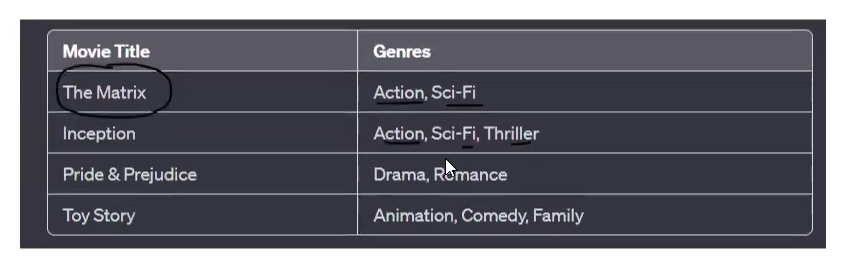

In [67]:
from sklearn.preprocessing import MultiLabelBinarizer

# Example multi-label data
y = [('red', 'blue'), ('blue', 'green'), ('green',), ('red',)]

# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Fit and transform the data to binary matrix format
Y = mlb.fit_transform(y)

print("Binary matrix:\n", Y)
print("Class labels:", mlb.classes_)

# Inverse transform to recover original labels
y_inv = mlb.inverse_transform(Y)
print("Inverse transformed labels:", y_inv)


Binary matrix:
 [[1 0 1]
 [1 1 0]
 [0 1 0]
 [0 0 1]]
Class labels: ['blue' 'green' 'red']
Inverse transformed labels: [('blue', 'red'), ('blue', 'green'), ('green',), ('red',)]


## Count/Frequency Encoding

In [1]:
!pip install category_encoders

  Obtaining dependency information for category_encoders from https://files.pythonhosted.org/packages/92/fb/908cb215a30b117bb079a767176038599a5447f2506e21aa2e90d0aabfff/category_encoders-2.8.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/85.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/85.7 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/85.7 kB ? eta -:--:--
   ------------------- -------------------- 41.0/85.7 kB 393.8 kB/s eta 0:00:01
   ---------------------------------------- 85.7/85.7 kB 603.8 kB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# dataset generation
import pandas as pd
import numpy as np
import category_encoders as ce

# Simulating a dataset
data = {
    'Age': np.random.randint(20, 60, size=100).astype(float),  # Random ages between 20 and 60
    'State': np.random.choice(['Karnataka', 'Tamil Nadu', 'Maharashtra', 'Delhi', 'Telangana'], size=100),
    'Education': np.random.choice(['High School', 'UG', 'PG'], size=100),
    'Package': np.random.rand(100) * 100  # Random package values for demonstration
}

# Introducing missing values in 'Age' column (5%)
np.random.seed(0)  # For reproducibility
missing_indices = np.random.choice(data['Age'].shape[0], replace=False, size=int(data['Age'].shape[0] * 0.05))
data['Age'][missing_indices] = np.nan

df = pd.DataFrame(data)

df.head()

,Age,State,Education,Package
0,54.0,Tamil Nadu,High School,40.612049
1,49.0,Delhi,PG,56.921076
2,NaN,Telangana,High School,34.360550
3,54.0,Delhi,PG,78.887278
4,33.0,Delhi,PG,41.137241


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Package']), df['Package'], test_size=0.2, random_state=42)

In [5]:
X_train.head()

,Age,State,Education
55,NaN,Tamil Nadu,High School
88,42.0,Maharashtra,PG
26,NaN,Maharashtra,PG
42,39.0,Delhi,PG
69,33.0,Delhi,High School


In [6]:
X_train['State'].value_counts()

State
Delhi          18
Tamil Nadu     17
Telangana      17
Maharashtra    14
Karnataka      14
Name: count, dtype: int64

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import sklearn

In [8]:
class CountEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns
        self.count_map = {}

    def fit(self, X, y=None):
        if self.columns is None:
            self.columns = X.columns
        for col in self.columns:
            self.count_map[col] = X[col].value_counts().to_dict()
        return self

    def transform(self, X):
        X = X.copy()
        for col in self.columns:
            X[col] = X[col].map(self.count_map[col]).fillna(0)
        return X

In [9]:
preprocessor = ColumnTransformer(
    transformers=[
        ('age_missing', SimpleImputer(strategy='mean'), ['Age']),
        ('cat_state', CountEncoder(), ['State']),
        ('education_ordinal', OrdinalEncoder(), ['Education'])
    ])

sklearn.set_config(transform_output="pandas")

In [10]:
preprocessor.fit_transform(X_train)

,age_missing__Age,cat_state__State,education_ordinal__Education
55,38.666667,17,0.0
88,42.000000,14,1.0
26,38.666667,14,1.0
42,39.000000,18,1.0
69,33.000000,18,0.0
...,...,...,...
60,45.000000,17,0.0
71,44.000000,17,0.0
14,50.000000,14,2.0
92,31.000000,14,2.0


In [13]:
# parameters
import pandas as pd
import numpy as np
import category_encoders as ce

# Simulating a dataset
np.random.seed(42)  # For reproducibility
data = {
    'State': np.random.choice(['Karnataka', 'Tamil Nadu', 'Maharashtra', 'Delhi', 'Telangana', np.nan], size=100),
    'Education': np.random.choice(['High School', 'UG', 'PG', np.nan], size=100)
}
df = pd.DataFrame(data)

df.head(25)


,State,Education
0,Delhi,PG
1,Telangana,High School
2,Maharashtra,High School
3,Telangana,High School
4,Telangana,PG
5,Tamil Nadu,High School
6,Maharashtra,nan
7,Maharashtra,High School
8,Maharashtra,nan
9,Telangana,nan


In [15]:
# Initialize the CountEncoder with various parameters
encoder = ce.CountEncoder(
    cols=['State', 'Education'],  # Specify columns to encode. None would automatically select categorical columns.
    handle_missing='error',  # Treat NaNs as a countable category
    handle_unknown='error',  # Treat unknown categories as NaNs (if seen during transform but not in fit)
)

In [16]:
# Fit and transform the dataset
encoder.fit_transform(df)

#print(encoded_df.head(25))

,State,Education
0,25,34
1,17,27
2,11,27
3,17,27
4,17,34
...,...,...
95,25,27
96,25,16
97,17,23
98,11,23


In [17]:
encoder.mapping

{'State': State
 Delhi          25
 Tamil Nadu     19
 Telangana      17
 nan            17
 Maharashtra    11
 Karnataka      11
 Name: count, dtype: int64,
 'Education': Education
 PG             34
 High School    27
 nan            23
 UG             16
 Name: count, dtype: int64}

### Binary Encoding
- Firstly convert them to ordinal encoding then to its binary form.

In [34]:
import pandas as pd
import category_encoders as ce

# Sample dataset
data = {
    'Item': ['Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'],
    'Fruit': ['Apple', 'Banana', 'Cherry', 'Date', 'Elderberry', 'Fig', 'Grape', 'Honeydew']
}
df = pd.DataFrame(data)

df


,Item,Fruit
0,Item1,Apple
1,Item2,Banana
2,Item3,Cherry
3,Item4,Date
4,Item5,Elderberry
5,Item6,Fig
6,Item7,Grape
7,Item8,Honeydew


In [35]:
# Initialize the Binary Encoder
encoder = ce.BinaryEncoder(cols=['Fruit'], return_df=True)

# Fit and transform the data
df_encoded = encoder.fit_transform(df)

# Display the original and encoded data
print(df_encoded)

    Item  Fruit_0  Fruit_1  Fruit_2  Fruit_3
0  Item1        0        0        0        1
1  Item2        0        0        1        0
2  Item3        0        0        1        1
3  Item4        0        1        0        0
4  Item5        0        1        0        1
5  Item6        0        1        1        0
6  Item7        0        1        1        1
7  Item8        1        0        0        0


### $Target Encoding$

In [36]:
# using category_encoder

import pandas as pd
import category_encoders as ce

# Sample data
data = {
    'Feature': ['A', 'B', 'A', 'B', 'C', 'A', 'B', 'C'],
    'Target': [1, 0, 0, 1, 1, 1, 0, 1]
}
df = pd.DataFrame(data)

# Separating the feature and target columns
X = df.drop('Target', axis=1)
y = df['Target']

# Initialize the TargetEncoder
encoder = ce.TargetEncoder(cols=['Feature'])

# Fit the encoder using the feature data and target variable
encoder.fit(X, y)

# Transform the data
encoded = encoder.transform(X)

# Show the original and encoded data
print(pd.concat([df, encoded], axis=1))


   Feature  Target   Feature
0        A       1  0.631436
1        B       0  0.579948
2        A       0  0.631436
3        B       1  0.579948
4        C       1  0.678194
5        A       1  0.631436
6        B       0  0.579948
7        C       1  0.678194


In [ ]:
# using sklearn
import pandas as pd
from sklearn.preprocessing import TargetEncoder

# Sample data
data = {
    'Feature': ['A', 'B', 'A', 'B', 'C', 'A', 'B', 'C'],
    'Target': [1, 0, 0, 1, 1, 1, 0, 1]
}
df = pd.DataFrame(data)

# Separating the feature and target columns
X = df.drop('Target', axis=1)
y = df['Target']

# Initialize the TargetEncoder
encoder = TargetEncoder(smooth=0.0) # smoothing help to control the nature of the graph 

# Fit the encoder using the feature data and target variable
encoder.fit(X, y)

# Transform the data
encoded = encoder.transform(X)

encoded


,Feature
0,0.666667
1,0.333333
2,0.666667
3,0.333333
4,1.000000
5,0.666667
6,0.333333
7,1.000000


### Weight Of Evidence (WOE)

In [1]:
import pandas as pd
import category_encoders as ce

# Example dataset
data = {
    'Feature': ['A', 'B', 'A', 'C', 'B', 'A', 'C', 'B', 'A', 'C'],
    'Target': [1, 0, 0, 1, 1, 0, 1, 0, 1, 0]
}
df = pd.DataFrame(data)

# Define the features and target
X = df[['Feature']]
y = df['Target']

# Initialize and fit the TargetEncoder
encoder = ce.WOEEncoder(cols=['Feature'])
X_encoded = encoder.fit_transform(X, y)

# Display the original and encoded data
df['Feature_Encoded'] = X_encoded
print(df)


  Feature  Target  Feature_Encoded
0       A       1         0.000000
1       B       0        -0.405465
2       A       0         0.000000
3       C       1         0.405465
4       B       1        -0.405465
5       A       0         0.000000
6       C       1         0.405465
7       B       0        -0.405465
8       A       1         0.000000
9       C       0         0.405465
